<a href="https://colab.research.google.com/github/mezgoodle/ad_labs/blob/master/docs/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt 

Варіант 7.

Файл Crime.csv.

1. Знайти середнє та медіанне значення витрат на поліцію.
2. Перевірити чи нормальні витрати на поліцію.
3. Перевірити чи в південних штатах вища частота злочинів.
4. Побудувати лінійну регресійну модель залежності частоти злочинів
від доходу.


# Дані

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mezgoodle/ad_labs/master/data/Crime.csv')
df

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,MatureUnemployment,HighYouthUnemploy,Wage,BelowWage,CrimeRate10,Youth10,Education10,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,22,1,564,139,26.5,135,12.5,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,40,1,453,200,35.9,135,10.9,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,34,0,288,276,37.1,153,11.0,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,53,0,457,249,42.7,139,11.8,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,25,1,593,171,46.7,125,12.2,97,602,989,0,42,79,24,1,660,162
5,67.6,128,0,13.5,67,624,972,0,28,77,25,1,507,206,47.9,128,13.8,60,621,983,0,28,81,24,1,571,199
6,70.5,130,0,14.1,63,641,984,0,14,70,21,1,486,196,50.6,153,14.1,57,641,993,0,14,71,23,1,556,176
7,73.2,143,0,12.9,66,537,977,0,10,114,35,1,487,166,55.9,143,13.0,63,549,973,0,11,119,36,1,561,168
8,75.0,141,0,12.9,56,523,968,0,4,107,37,0,489,170,61.8,153,12.9,54,538,968,0,5,110,36,1,550,126
9,78.1,133,0,11.4,51,599,1024,1,7,99,27,1,425,225,65.4,134,11.2,47,600,1024,1,7,97,28,1,499,215


In [3]:
crime_rate = df['CrimeRate']
crime_rate_10 = df['CrimeRate10']
expenditure = df['ExpenditureYear0']
expenditure_10 = df['ExpenditureYear10']
wage = df['Wage']
wage_10 = df['Wage10']

In [4]:
crime_rate

0      45.5
1      52.3
2      56.6
3      60.3
4      64.2
5      67.6
6      70.5
7      73.2
8      75.0
9      78.1
10     79.8
11     82.3
12     83.1
13     84.9
14     85.6
15     88.0
16     92.3
17     94.3
18     95.3
19     96.8
20     97.4
21     98.7
22     99.9
23    103.0
24    104.3
25    105.9
26    106.6
27    107.2
28    108.3
29    109.4
30    112.1
31    114.3
32    115.1
33    117.2
34    119.7
35    121.6
36    123.4
37    127.2
38    132.4
39    135.5
40    137.8
41    140.8
42    145.4
43    149.3
44    154.3
45    157.7
46    161.8
Name: CrimeRate, dtype: float64

In [5]:
crime_rate_10

0      26.5
1      35.9
2      37.1
3      42.7
4      46.7
5      47.9
6      50.6
7      55.9
8      61.8
9      65.4
10     71.4
11     75.4
12     77.3
13     78.6
14     80.6
15     82.2
16     87.5
17     92.9
18     94.1
19     96.2
20     97.8
21     99.9
22    101.4
23    103.5
24    104.5
25    106.4
26    107.8
27    110.1
28    110.5
29    113.5
30    116.3
31    119.7
32    124.5
33    127.8
34    129.8
35    130.7
36    132.5
37    134.6
38    137.5
39    140.5
40    145.7
41    150.6
42    157.3
43    162.7
44    169.6
45    177.2
46    178.2
Name: CrimeRate10, dtype: float64

In [6]:
expenditure

0      69
1      55
2      47
3      46
4     106
5      67
6      63
7      66
8      56
9      51
10     45
11     97
12     62
13    118
14     58
15     71
16     74
17    128
18     90
19     58
20     57
21     75
22     61
23     58
24     75
25     90
26     65
27     72
28     97
29    123
30     81
31     82
32     78
33     95
34    166
35     63
36     82
37     87
38     82
39    113
40    109
41    109
42    115
43    103
44    121
45    149
46    160
Name: ExpenditureYear0, dtype: int64

In [7]:
expenditure_10

0      71
1      54
2      44
3      41
4      97
5      60
6      57
7      63
8      54
9      47
10     44
11     87
12     61
13    115
14     54
15     68
16     67
17    128
18     81
19     56
20     53
21     70
22     54
23     56
24     71
25     91
26     62
27     66
28     97
29    115
30     77
31     79
32     73
33     96
34    157
35     64
36     74
37     83
38     76
39    105
40    101
41     98
42    109
43     95
44    116
45    141
46    143
Name: ExpenditureYear10, dtype: int64

In [8]:
wage

0     564
1     453
2     288
3     457
4     593
5     507
6     486
7     487
8     489
9     425
10    318
11    572
12    529
13    689
14    396
15    526
16    557
17    627
18    617
19    394
20    405
21    496
22    395
23    382
24    580
25    588
26    421
27    590
28    589
29    631
30    427
31    620
32    540
33    622
34    637
35    462
36    488
37    513
38    537
39    626
40    578
41    559
42    472
43    557
44    657
45    673
46    674
Name: Wage, dtype: int64

In [9]:
wage_10

0     632
1     521
2     359
3     510
4     660
5     571
6     556
7     561
8     550
9     499
10    378
11    639
12    591
13    742
14    568
15    570
16    621
17    692
18    679
19    465
20    470
21    562
22    476
23    456
24    649
25    649
26    499
27    656
28    659
29    703
30    500
31    696
32    615
33    691
34    698
35    511
36    550
37    589
38    617
39    684
40    649
41    635
42    539
43    625
44    719
45    739
46    748
Name: Wage10, dtype: int64

# Перше завдання

In [10]:
crime_rate.mean()

102.80851063829788

In [11]:
crime_rate_10.mean()

102.07021276595745

In [12]:
crime_rate.median()

103.0

In [13]:
crime_rate_10.median()

103.5

## Результат

За допомогою методів *mean()* (середнє значення) та *median()* (медіанне значення) отримали дані значення.

# Друге завдання


In [14]:
k2, p = stats.normaltest(expenditure)
p

0.024191464680392346

In [15]:
k2, p = stats.normaltest(expenditure_10)
p

0.037915806843325905

Статистичними називають гіпотези про вигляд розподілу генеральної
сукупності або про параметри відомих розподілів.

Основною (нульовою) називають висунуту гіпотезу і позначають H0.

Альтернативною (конкурентною) називають гіпотезу, що суперечить
основній, її позначають H1. Альтернативні гіпотези бувають двосторонніми та
односторонніми.

Алгоритм перевірки гіпотез:

1. Визначити параметр, стосовно якого потрібно перевірити гіпотезу
2. Визначити основну гіпотезу H0
3. Визначити гіпотезу H1 , двосторонню чи односторонню, альтернативну
до гіпотези H0
4. Обрати статистичний критерій для перевірки
5. Визначити критерій відхилення основної гіпотези, наприклад, р-значення
нижче за певний рівень значущості α (найчастіше 0,05)
6. Використати відповідну функцію і отримати значення статистичного
критерію та р-значення
7. Зробити висновки: чи потрібно відхилити основну гіпотезу.

Коваріація та коефіцієнт кореляції Пірсона показують міру лінійного
зв’язку між випадковими величинами. Коефіцієнт кореляції рангу Спірмена є
непараметричним показником монотонності зв'язку між двома наборами даних.
На відміну від кореляції Пірсона, кореляція Спірмена не передбачає нормального
розподілу обох наборів даних. Коефіцієнт кореляції рангу Кендала або тау-
коефіцієнт є непараметричним показником подібності впорядкування даних.




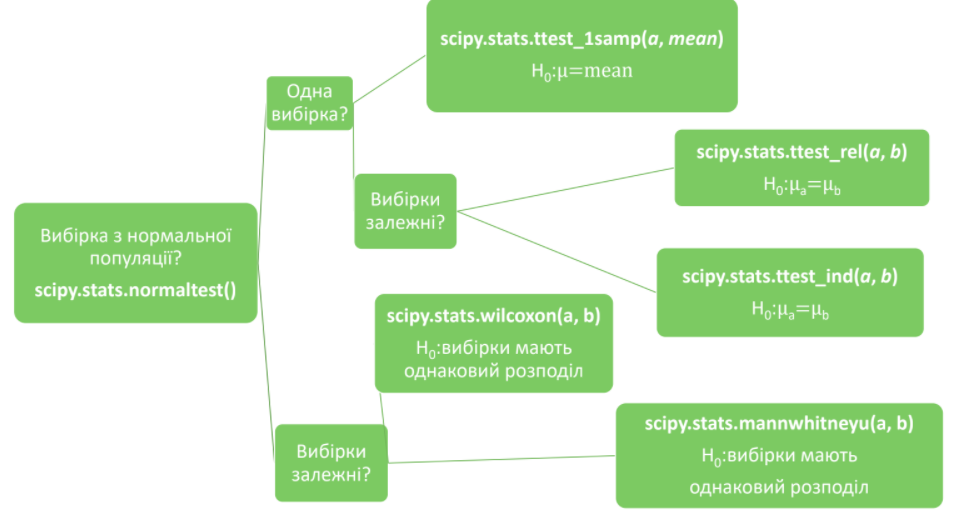

# Третє завдання

In [25]:
df.groupby(['Southern'])['CrimeRate'].mean()

Southern
0    103.906452
1    100.681250
Name: CrimeRate, dtype: float64

## Результат

Згрупувавши дані по стовпцю "Southern" та взявши середнє значення по стовпцю "CrimeRate", бачимо, що у південних штатах частота злочинності **менша**


# Четверте завдання

In [17]:
# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(crime_rate, wage)
stats.linregress(crime_rate, wage)

LinregressResult(slope=1.4188243361385242, intercept=379.51576186763083, rvalue=0.4248530127607084, pvalue=0.0029142013171254465, stderr=0.4506694581290484)

Text(0, 0.5, 'wage')

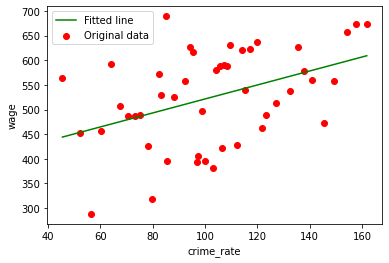

In [18]:
# Plot linear regression line.
wage_pred = intercept + slope*crime_rate
plt.scatter(crime_rate, wage, color="red", marker="o", label="Original data")
plt.plot(crime_rate, wage_pred, color="green", label="Fitted line")
# Set labels
plt.legend(loc='best')
plt.xlabel('crime_rate') 
plt.ylabel('wage') 